---
#Denmark vs Germany

---

###Which nation is more potato?

##Goal
This analysis aims to determine which nation consumes more potatoes now and has done so historically. As well as compare the amount of land used for growing potatoes for human consumption in comparison to the countries overall size.

The data sets are obtained from the statistic institutes of the respective countries.
* Denmark - [Danmarks Statistik](https://www.dst.dk/en/)
* Germany - [Statistisches Bundesamt](https://www.destatis.de/DE/Home/_inhalt.html)
* Germany - [Bundesinformationszentrum Landwirtschaft](https://www.ble.de/DE/BZL/Daten-Berichte/Kartoffeln/Kartoffeln_node.html;jsessionid=8681CD395D259B8E611E3A6D6203DCF7.internet011)

##Results

According to the consumption per person and the agricultural use of land for growing potatoes, Germany is the chunkier potato nation.<br>
With 57,9 kg per head per year Germans consumed 17,9 kg of potatoes more than Danes with their 40 kg in 2010.<br>
0,74 % of Germanys total area in 2022 was used for growing potatoes for human consumption, while only 0,16 % of Denmarks land was used for that purpose.

##Outlook

Further analysis could examin the export/import ratio, the different varities grown on fields or the percentage of a household's budget used for the starchy root vegetable. As well as look at the cultural significance with the amount of different potato dishes each country has on their menu.

---
#Analysis

---

In [3]:
# import libraries
import pandas as pd
import numpy as np

In [4]:
# to use downloaded and in Google Drive uploaded tables
# allow access to all Google Drive content
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Cleaning data

###Denmark

#### Agriculture

In [5]:
dk_crops = pd.read_csv('/content/drive/MyDrive/Data-Analyst/Colab-Notebooks/potatoes-data/stat-dk_potato_crops-by-unit-area-time.csv', header=1)

In [6]:
dk_crops.head()

,,.1,.2,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Farms (numbers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,3.1 Potatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,Total,9924,8517,8087,7482,6421,6085,6006.0,...,1929,1857,1469,1680,1754,1634,1612,1694,1596,1489
3,,,Less than 10.0 hectares,1935,1593,1313,1249,962,904,983.0,...,289,159,120,175,232,189,153,152,149,152
4,,,10.0 - 19.9 hectares,2572,2169,1962,1709,1464,1290,1286.0,...,224,243,103,174,127,109,157,142,122,120


In [7]:
dk_crops = dk_crops.dropna()

In [8]:
dk_crops.shape

(72, 44)

In [9]:
s_crop_farms = dk_crops.loc[32] # farms human consumption

In [10]:
s_crop_ha = dk_crops.loc[73] # ha human consumption

In [11]:
s_crop_farms = s_crop_farms.replace('..', np.nan)

In [12]:
s_crop_farms = s_crop_farms.iloc[3:]

In [13]:
s_crop_ha = s_crop_ha.replace('..', np.nan)

In [14]:
s_crop_ha = s_crop_ha.iloc[3:]

In [15]:
dk_crops_new = pd.concat([s_crop_ha, s_crop_farms], axis=1)

In [16]:
dk_crops_new = dk_crops_new.rename(columns={73:'Area(ha)', 32:'Farms'})

In [17]:
dk_crops_new['Area(ha)'] = dk_crops_new['Area(ha)'].astype(float)
dk_crops_new['Farms'] = dk_crops_new['Farms'].astype(float)

In [18]:
print(dk_crops_new) # year 1982 to 2022

      Area(ha)   Farms
1982       NaN     NaN
1983       NaN     NaN
1984       NaN     NaN
1985       NaN     NaN
1986       NaN     NaN
1987       NaN     NaN
1988   13145.0  4419.0
1989   11015.0  3376.0
1990   10999.0  3141.0
1991   10934.0  2738.0
1992   13485.0  2929.0
1993   12137.0  2644.0
1994    9782.0  2295.0
1995       NaN     NaN
1996   11690.0  3061.0
1997   10096.0  1706.0
1998    8705.0  1732.0
1999   10965.0  1859.0
2000   11524.0  1903.0
2001   11809.0  1733.0
2002   13754.0  1708.0
2003   12226.0  1659.0
2004   16578.0  1995.0
2005   16278.0  1868.0
2006   15210.0  1646.0
2007   15689.0  1643.0
2008   17981.0  1692.0
2009   15787.0  1527.0
2010   16312.0  1523.0
2011   16433.0  1513.0
2012   13764.0  1352.0
2013   14218.0  1464.0
2014   15753.0  1382.0
2015   13716.0  1018.0
2016   12793.0  1198.0
2017   13230.0  1172.0
2018   12801.0  1120.0
2019   11903.0   994.0
2020   11170.0   970.0
2021    6058.0   838.0
2022    6811.0   781.0


#### Consumption

In [88]:
dk_consum = pd.read_csv('/content/drive/MyDrive/Data-Analyst/Colab-Notebooks/potatoes-data/stat-dk_potato_consumption-1990-2010.csv', header=1)

In [89]:
dk_consum = dk_consum.loc[1:2]

In [90]:
dk_consum_total = dk_consum.loc[1]

In [91]:
dk_consum_total = dk_consum_total.iloc[2:]

In [92]:
dk_consum_total = dk_consum_total.replace('..', np.nan)

In [93]:
dk_consum_total.name = 'DK: Consumption Total (in t)'

In [94]:
dk_consum_total = dk_consum_total * 1000

In [109]:
dk_consum_per = dk_consum.loc[2]

In [110]:
dk_consum_per = dk_consum_per.iloc[2:]

In [111]:
dk_consum_per = dk_consum_per.replace('..', np.nan)

In [112]:
dk_consum_per.name = 'DK: Consumption per person (in kg)'

In [113]:
print(dk_consum_per)

1990    56.9
1991    56.9
1992    56.9
1993    56.9
1994    59.9
1995    56.9
1996    56.9
1997    56.9
1998    56.9
1999    56.9
2000    56.9
2001    56.9
2002    56.9
2003    56.9
2004    55.0
2005    55.0
2006    55.0
2007    54.8
2008    55.0
2009    55.1
2010    40.0
2011     NaN
2012     NaN
Name: DK: Consumption per person (in kg), dtype: float64


### Germany

####Agriculture

In [31]:
# CSV for 2013 to 2023

de_crops_b = pd.read_csv('/content/drive/MyDrive/Data-Analyst/Colab-Notebooks/potatoes-data/stat-de_area-under-cultivation_crops-2013-2023.csv',
                         header=6)

In [32]:
s_crop_b_all = de_crops_b.iloc[20]

In [33]:
s_crop_b_all = s_crop_b_all.iloc[1:]

In [34]:
years_b = np.arange(2013, 2024, 1)

In [35]:
years_b = years_b.astype(str)

In [36]:
s_crop_b_ha = s_crop_b_all[years_b]

In [37]:
# CSV for 1950 to 2009

de_crops_a = pd.read_csv('/content/drive/MyDrive/Data-Analyst/Colab-Notebooks/potatoes-data/stat-de_area-under-cultivation_crops-1950-2009.csv',
                         header=7)

In [38]:
s_crop_a_all = de_crops_a.iloc[26]

In [39]:
s_crop_a_all = s_crop_a_all.iloc[1:]

In [40]:
s_crop_a_ha = s_crop_a_all

In [41]:
de_crops_new = pd.concat([s_crop_a_ha, s_crop_b_ha])

In [42]:
de_crops_new.name = 'Area(ha)'

In [43]:
de_crops_new = de_crops_new.astype(int)

In [44]:
print(de_crops_new) # year 1950 to 2023

1950    1154811
1951    1130832
1952    1161445
1953    1178183
1954    1204964
         ...   
2019     271600
2020     273500
2021     258300
2022     266400
2023     262600
Name: Area(ha), Length: 71, dtype: int64


####Consumption

In [45]:
de_consum = pd.read_csv('/content/drive/MyDrive/Data-Analyst/Colab-Notebooks/potatoes-data/Versorgung-Kartoffeln_22-23_nahrungsverbrauch_new.csv', header=0)

In [46]:
de_consum_total = de_consum.loc[0]
de_consum_total = de_consum_total.iloc[1:]
de_consum_total = de_consum_total.str.replace(' ','')
de_consum_total = de_consum_total.astype(int)
de_consum_total = de_consum_total * 1000
de_consum_total.name = 'DE: Consumption Total (in t)'

In [47]:
de_consum_per = de_consum.loc[1]
de_consum_per = de_consum_per.iloc[1:]
de_consum_per = de_consum_per.str.replace(',','.')
de_consum_per = de_consum_per.astype(float)

de_consum_per.name = 'DE: Consumption per person (in kg)'

In [48]:
print(de_consum_per)

2004    71.1
2010    57.9
2011    65.7
2012    59.8
2013    58.1
2014    58.0
2015    57.5
2016    57.9
2017    60.4
2018    55.4
2019    57.2
2020    59.6
2021    56.1
2022    54.1
Name: DE: Consumption per person (in kg), dtype: float64


##Area Comparison

In [49]:
# join DK and DE area(ha) and create column with area(ha) / area(country)

In [131]:
crops_area = pd.concat([de_crops_new, dk_crops_new['Area(ha)']], axis=1)

In [132]:
crops_area.columns = ['DE: Area (ha)', 'DK: Area (ha)']

In [133]:
crops_area = crops_area.sort_index()

In [158]:
# add values 2010-2012

de_2009 = crops_area['DE: Area (ha)'].loc['2009']
de_2013 = crops_area['DE: Area (ha)'].loc['2013']


de_2010 = de_2009 - (de_2009 - de_2013) / 4
de_2011 = de_2010 - (de_2009 - de_2013) / 4
de_2012 = de_2011 - (de_2009 - de_2013) / 4

crops_area['DE: Area (ha)'].loc['2010'] = de_2010
crops_area['DE: Area (ha)'].loc['2011'] = de_2011
crops_area['DE: Area (ha)'].loc['2012'] = de_2012


In [134]:
de_ha = 35759500

In [135]:
dk_ha = 4295400

In [159]:
crops_area['DE: Area / Country size in %'] = crops_area['DE: Area (ha)'] / de_ha * 100

In [138]:
crops_area['DK: Area / Country size in %'] = crops_area['DK: Area (ha)'] / dk_ha * 100

In [157]:
print(crops_area.columns)

      DE: Area (ha)  DK: Area (ha)  DE: Area / Country size in %  \
1950      1154811.0            NaN                      3.229382   
1951      1130832.0            NaN                      3.162326   
1952      1161445.0            NaN                      3.247934   
1953      1178183.0            NaN                      3.294741   
1954      1204964.0            NaN                      3.369633   
...             ...            ...                           ...   
2019       271600.0        11903.0                      0.759518   
2020       273500.0        11170.0                      0.764832   
2021       258300.0         6058.0                      0.722326   
2022       266400.0         6811.0                      0.744977   
2023       262600.0            NaN                      0.734350   

      DK: Area / Country size in %  
1950                           NaN  
1951                           NaN  
1952                           NaN  
1953                           NaN 

## Final Dataframe

In [160]:
potatoes = pd.concat([crops_area['DE: Area (ha)'], crops_area['DE: Area / Country size in %'], de_consum_total, de_consum_per, crops_area['DK: Area (ha)'], crops_area['DK: Area / Country size in %'], dk_consum_total, dk_consum_per], axis=1)

In [ ]:
print(potatoes.loc['1991':'2022']) # timeframe with most available values

In [234]:
potatoes.columns

Index(['DE: Area (ha)', 'DE: Area / Country size in %',
       'DE: Consumption Total (in t)', 'DE: Consumption per person (in kg)',
       'DK: Area (ha)', 'DK: Area / Country size in %',
       'DK: Consumption Total (in t)', 'DK: Consumption per person (in kg)'],
      dtype='object')

In [163]:
potatoes.to_csv('potatoes.csv')

---
# Visualisations

---

In [269]:
import matplotlib.pyplot as plt

%matplotlib inline

<Axes: >

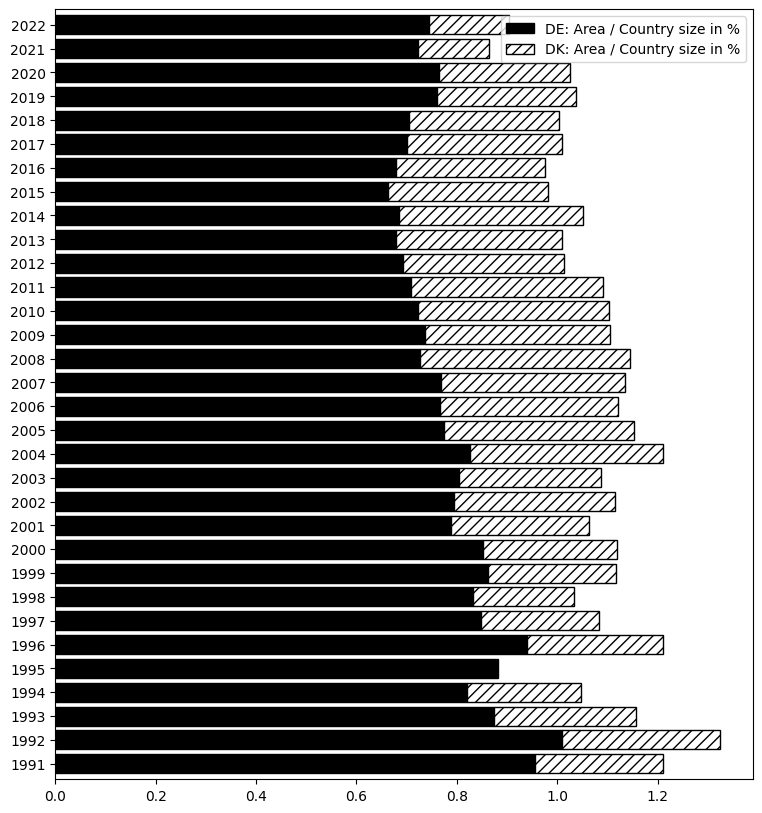

In [231]:
# Area comparison 1991 - 2022

potatoes.loc['1991':'2022'].plot(kind='barh',
                                 use_index=True,
                                 stacked=True,
                                 width=0.8,
                                 y=['DE: Area / Country size in %', 'DK: Area / Country size in %'],
                                 color=['black', 'white'],
                                 edgecolor=['black'],
                                 hatch='///',
                                 figsize=(9, 10))

<Axes: >

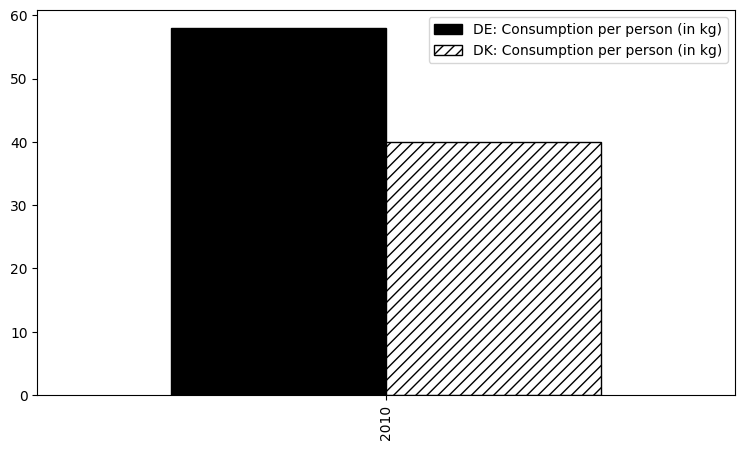

In [247]:
# Consumption comparison 2010

potatoes.loc['2010':'2010'].plot(kind='bar',
                                 use_index=True,
                                 width=0.8,
                                 y=['DE: Consumption per person (in kg)', 'DK: Consumption per person (in kg)'],
                                 color=['black', 'white'],
                                 edgecolor=['black'],
                                 hatch='///',
                                 figsize=(9, 5))

<Axes: >

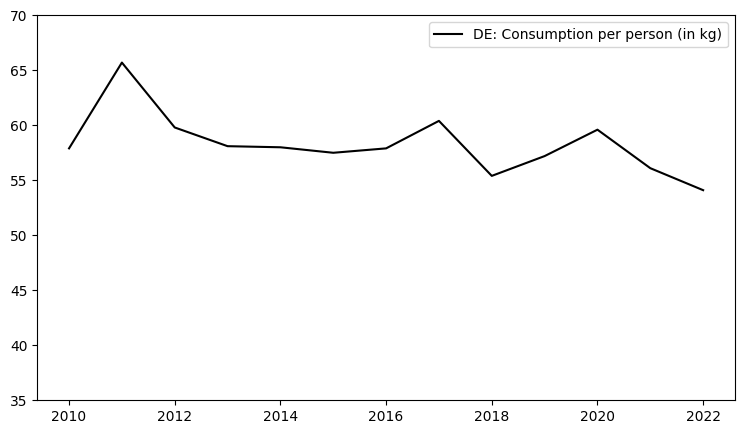

In [267]:
# DE: Consumption over time (2010 - 2022)

potatoes.loc['2010':'2022'].plot(kind='line',
                                 use_index=True,
                                 y=['DE: Consumption per person (in kg)'],
                                 color=['black'],
                                 ylim=(35,70),
                                 figsize=(9, 5))

<Axes: >

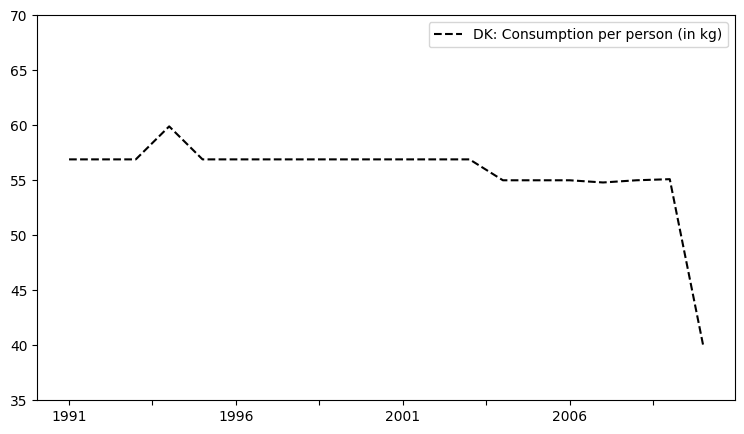

In [268]:
# DK: Consumption over time (1991 - 2010)

potatoes.loc['1991':'2010'].plot(kind='line',
                                 use_index=True,
                                 y=['DK: Consumption per person (in kg)'],
                                 color=['black'],
                                 linestyle='dashed',
                                 ylim=(35,70),
                                 figsize=(9, 5))